# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [153]:
# imports:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [154]:
# importing the CSV:
df_raw= pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
df_raw.to_csv('../data/raw/housing_raw.csv')

In [155]:
print(f'The Dataset has {df_raw.shape[0]} "observations" with {df_raw.shape[1]} columns')

The Dataset has 20640 "observations" with 9 columns


In [156]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


There are no nulls.

In [157]:
df_raw.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [158]:
df_raw.head(12)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


### Features Analysis

All features are numerical

In [159]:
# duplicates:
df_raw.duplicated().sum()

0

In [160]:
# functions to use in numerical features EDA:

def numerical(df, feature) :
    print(f'='*30)
    print(f'{feature.upper()} ANALISYS')
    print(f'='*30)

    nuniques = df[feature].nunique()
    counts = df[feature].value_counts()
    print(f'There are {nuniques} different values in {feature}')
    print(f'{counts}')

def graphs(df, feature, bins) :
    # hist:
    if bins == 0 :
        df.hist(feature, grid=True, figsize=(6,6), bins=df[feature].nunique())
    else :
        df.hist(feature, grid=True, figsize=(6,6), bins=bins)
    plt.show()
    
    # boxplot:
    sns.catplot(y=feature, kind='box', data=df)
    plt.show()

MEDINC ANALISYS
There are 12928 different values in MedInc
3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: MedInc, Length: 12928, dtype: int64


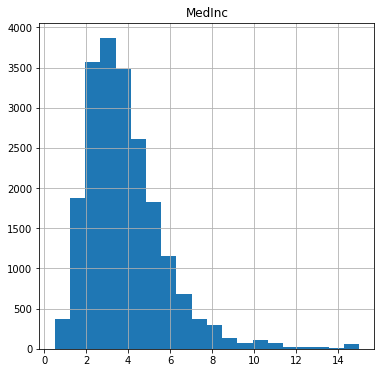

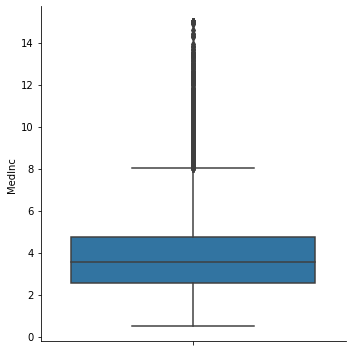

HOUSEAGE ANALISYS
There are 52 different values in HouseAge
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: HouseAge, dtype: int64


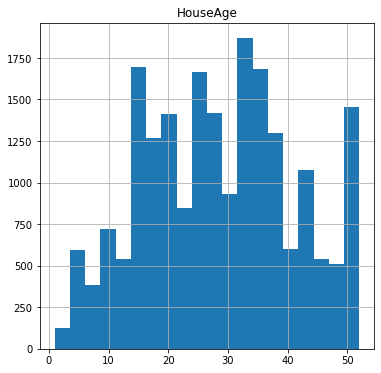

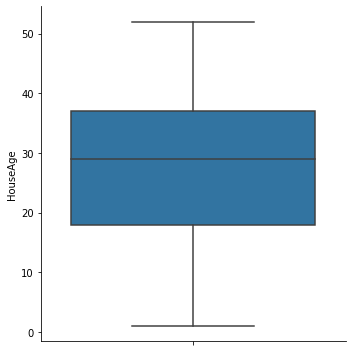

AVEROOMS ANALISYS
There are 19392 different values in AveRooms
5.000000    27
4.500000    22
4.000000    21
6.000000    20
5.333333    13
            ..
3.532286     1
4.793919     1
4.964602     1
4.539088     1
5.254717     1
Name: AveRooms, Length: 19392, dtype: int64


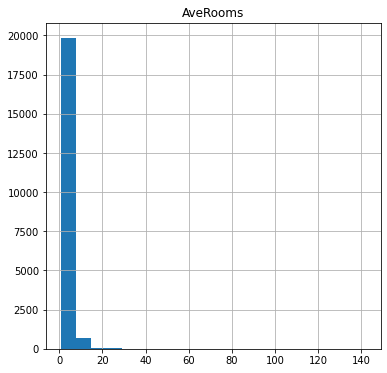

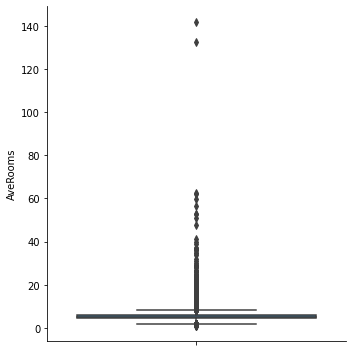

AVEBEDRMS ANALISYS
There are 14233 different values in AveBedrms
1.000000    288
1.125000     29
1.058824     26
1.100000     25
1.083333     25
           ... 
0.932886      1
0.906883      1
1.164894      1
1.030853      1
1.162264      1
Name: AveBedrms, Length: 14233, dtype: int64


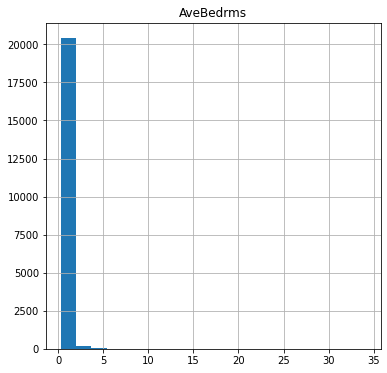

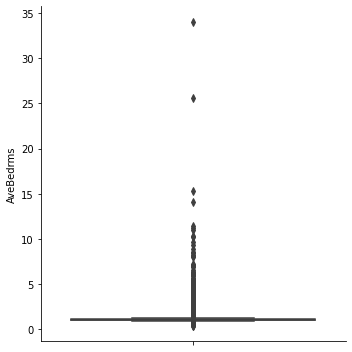

POPULATION ANALISYS
There are 3888 different values in Population
891.0     25
761.0     24
1227.0    24
1052.0    24
850.0     24
          ..
2141.0     1
5546.0     1
3186.0     1
3590.0     1
6912.0     1
Name: Population, Length: 3888, dtype: int64


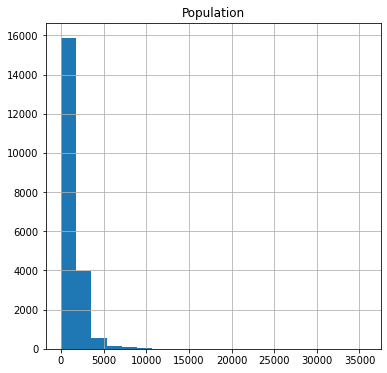

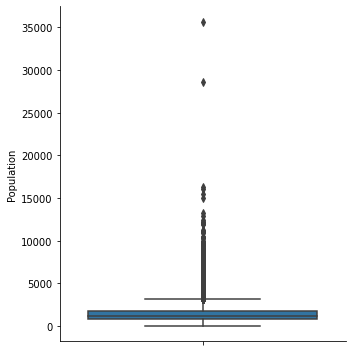

AVEOCCUP ANALISYS
There are 18841 different values in AveOccup
3.000000    35
2.000000    18
2.500000    17
2.666667    16
2.333333    13
            ..
2.425926     1
2.942568     1
2.816254     1
2.837104     1
2.616981     1
Name: AveOccup, Length: 18841, dtype: int64


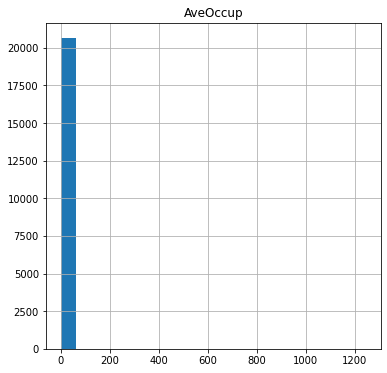

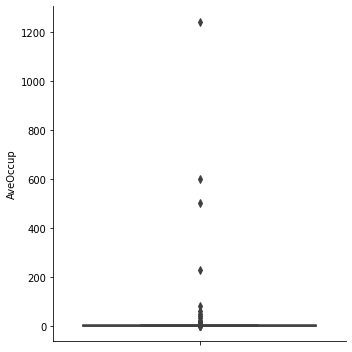

LATITUDE ANALISYS
There are 862 different values in Latitude
34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
41.01      1
41.36      1
41.13      1
40.30      1
35.88      1
Name: Latitude, Length: 862, dtype: int64


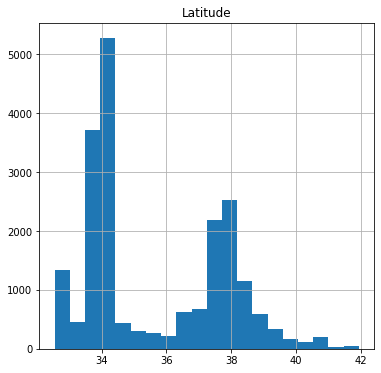

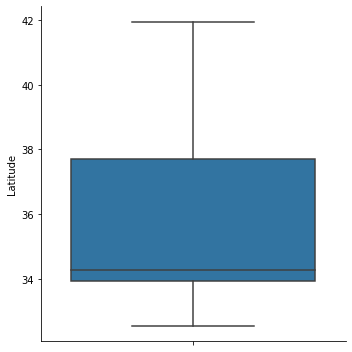

LONGITUDE ANALISYS
There are 844 different values in Longitude
-118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
          ... 
-123.54      1
-115.94      1
-115.99      1
-116.81      1
-123.71      1
Name: Longitude, Length: 844, dtype: int64


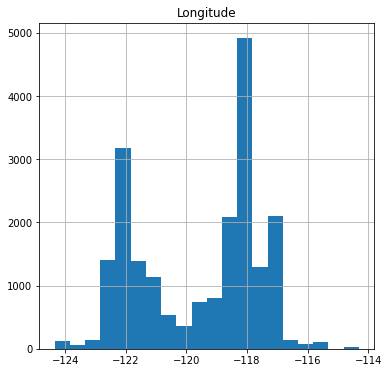

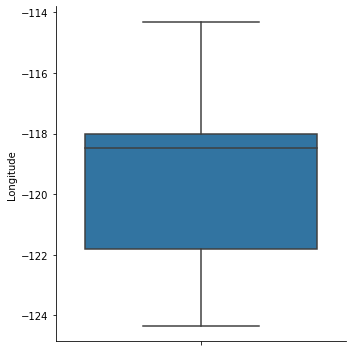

MEDHOUSEVAL ANALISYS
There are 3842 different values in MedHouseVal
5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: MedHouseVal, Length: 3842, dtype: int64


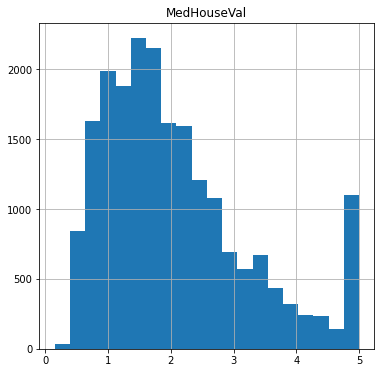

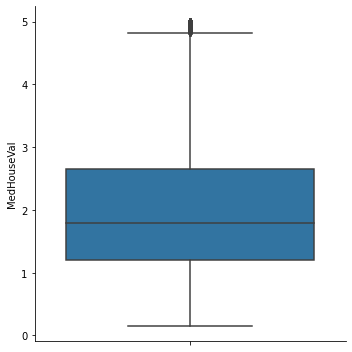

In [161]:
for feature in df_raw.columns :
    numerical(df_raw, feature)
    graphs(df_raw, feature, bins=20)

Important featurees are: 'latitude','longitude' and 'medincome'
- There are 'medinc' outliers

In [162]:
# Will keep onle the desired features:
df_interim = df_raw[['Latitude', 'Longitude', 'MedInc']]

In [163]:
# 'MedInc' outliers analysis:
def iqr_calc(col_name):
    stat = df_interim[f'{col_name}'].describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5*IQR
    lower = stat['25%']
    rows_out =  df_interim[df_interim[f'{col_name}'] > upper].count()
    return f'In the {col_name} case the upper & lower for bounds for suspected outliers are {upper} and {lower}. Total of row off upper bound \n{rows_out} \n'

print(iqr_calc('MedInc'))

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64
In the MedInc case the upper & lower for bounds for suspected outliers are 8.013024999999999 and 2.5633999999999997. Total of row off upper bound 
Latitude     681
Longitude    681
MedInc       681
dtype: int64 



In [176]:
# Remove high outliers for MedInc
df_interim = df_interim.drop(df_interim[df_interim['MedInc'] > 8.01].index)

MEDINC ANALISYS
There are 12300 different values in MedInc
3.1250    49
2.8750    46
2.6250    44
4.1250    44
3.8750    41
          ..
4.1449     1
4.0774     1
4.1767     1
6.1814     1
2.0943     1
Name: MedInc, Length: 12300, dtype: int64


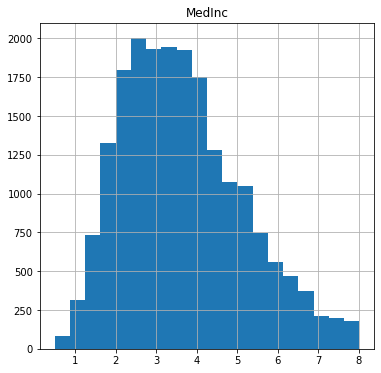

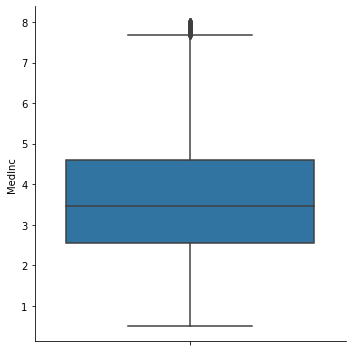

In [177]:
numerical(df_interim, 'MedInc')
graphs(df_interim, 'MedInc', bins=20)

In [166]:
# scale the data:
scaler = MinMaxScaler()
scaler.fit_transform(df_interim)

array([[0.5642933 , 0.21015936, 0.89984819],
       [0.5642933 , 0.20916335, 0.68488335],
       [0.5642933 , 0.20916335, 0.44560296],
       ...,
       [0.73219979, 0.31175299, 0.15980878],
       [0.73219979, 0.30179283, 0.18207361],
       [0.72582359, 0.30976096, 0.25150474]])

In [167]:
df_interim.to_csv('../data/interim/housing_interim.csv')
df = df_interim.copy()

In [168]:
df.head(5)

,Latitude,Longitude,MedInc
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
5,37.85,-122.25,4.0368
6,37.84,-122.25,3.6591


In [169]:
# K-means model and fit:
model_kmeans = KMeans(n_clusters=6, random_state=13)
model_kmeans.fit(df)

KMeans(n_clusters=6, random_state=13)

In [170]:
# K-means extra info:
print(f'K-Means Labels: {model_kmeans.labels_}')
print(f'K-Means Cluster Centers: \n {model_kmeans.cluster_centers_}')

K-Means Labels: [3 3 0 ... 0 0 0]
K-Means Cluster Centers: 
 [[  38.39511166 -121.88323805    2.71649987]
 [  33.87345267 -117.96455135    3.9327296 ]
 [  33.78163163 -117.74765015    2.29546709]
 [  37.73330155 -121.96669188    5.19801772]
 [  33.85337961 -118.04214751    5.99389861]
 [  36.12052158 -119.73904077    2.66444766]]


In [171]:
# K-means clustering for df:
prediction = model_kmeans.predict(df)

In [172]:
# Assign 'Cluster' to a new column on the dataset
df['Cluster'] = pd.Series(prediction, index=df.index)

CLUSTER ANALISYS
There are 6 different values in Cluster
0    4495
1    4481
2    3976
3    3024
4    2313
5    1668
Name: Cluster, dtype: int64


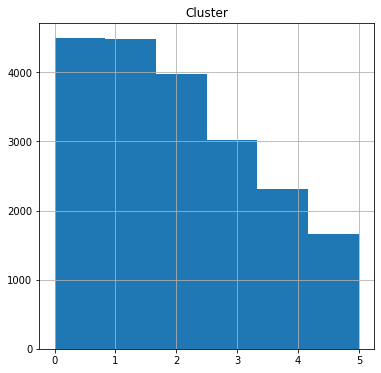

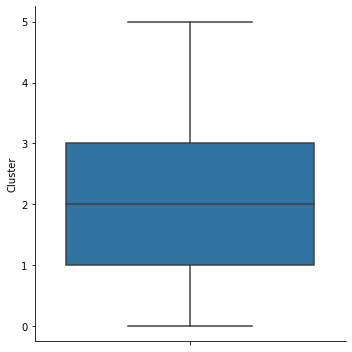

In [179]:
# Cluster distribution:
numerical(df, 'Cluster')
graphs(df, 'Cluster', bins=0)

In [181]:
# define the cluster as categorical:
df['Cluster'] = df['Cluster'].astype('category')

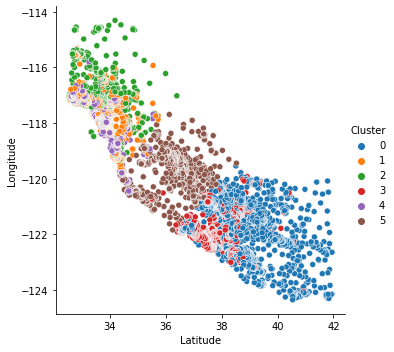

In [186]:
# plot Lat, Long and Cluster
sns.relplot(x='Latitude', y='Longitude', hue='Cluster', data=df)